In [2]:
import pandas as pd

BASE_URL = 'https://raw.githubusercontent.com/WHOIGit/nes-lter-examples/master/data/'

In [8]:
chl = pd.read_csv(BASE_URL + 'neslter_sosik_chl.csv')

In [14]:
chl = chl[chl['cruise'] == 'EN608']
chl = chl[chl['filter_mesh_size'] == '>0']
chl.head()

,cruise,date,lter_station,cast,niskin,time_in,time_out,replicate,vol_filtered,filter_size,...,chl,phaeo,cal_date,personnel_filter,personnel_read,fluorometer,comments,comments_2,freeze,filter_mesh_size
89,EN608,2018-01-31 00:00:00,L1,1,2,2018-01-31 22:00:00,2018-02-02 00:05:30,a,282.0,0,...,5.522860,1.286630,2018-01-26 00:00:00,Taylor,Emily & Ian,Aquafluor,NaN,NaN,False,>0
90,EN608,2018-01-31 00:00:00,L1,1,2,2018-01-31 22:00:00,2018-02-02 00:05:30,b,282.0,0,...,5.951205,1.493858,2018-01-26 00:00:00,Taylor,Emily & Ian,Aquafluor,NaN,NaN,False,>0
91,EN608,2018-01-31 00:00:00,L1,1,5,2018-01-31 22:00:00,2018-02-02 00:05:30,a,287.0,0,...,4.938519,1.669221,2018-01-26 00:00:00,Taylor,Emily & Ian,Aquafluor,NaN,NaN,False,>0
92,EN608,2018-01-31 00:00:00,L1,1,5,2018-01-31 22:00:00,2018-02-02 00:05:30,b,285.0,0,...,5.409551,1.323736,2018-01-26 00:00:00,Taylor,Emily & Ian,Aquafluor,NaN,NaN,False,>0
95,EN608,2018-01-31 00:00:00,L1,1,9,2018-01-31 22:00:00,2018-02-02 00:05:30,a,288.0,0,...,5.258894,1.361721,2018-01-26 00:00:00,Taylor,Emily & Ian,Aquafluor,NaN,NaN,False,>0


In [20]:
# put replicates side by side
rep_a = chl[chl.replicate == 'a']
rep_b = chl[chl.replicate == 'b']
merged = rep_a.merge(rep_b, on=['cruise','cast','niskin'])
# select and rename columns
merged = merged[['chl_x','chl_y']]
merged.columns = ['a','b']
merged.head()

,a,b
0,5.522860,5.951205
1,4.938519,5.409551
2,5.258894,5.516999
3,5.273513,5.414948
4,3.921003,3.746116


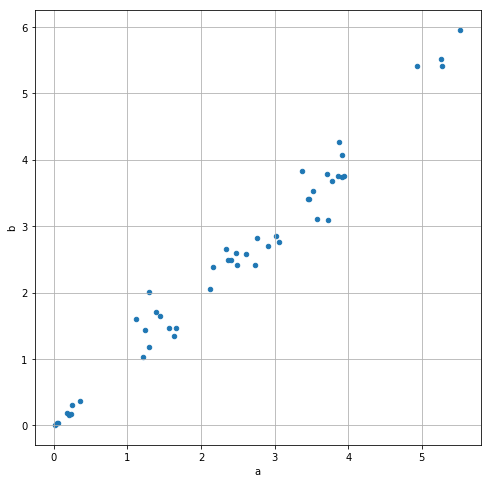

In [25]:
%matplotlib inline

merged.plot.scatter(x='a', y='b', figsize=(8,8), grid=True)